In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/online_store_customer_data.csv")
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [20]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [21]:
# Transaction_date está como object, es recomendable cambiarlo  a formato datetime
df["Transaction_date"] = pd.to_datetime(df["Transaction_date"], errors='coerce')

In [22]:
#revisar si existen valores nulos
print(df.isnull().sum())

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64


In [23]:
#cambiamos los valores nulos de genero con Undefined
df["Gender"] = df["Gender"].fillna("Undefined")

In [24]:
#reemplazamos los valores nulos de edad con un valor desconocido -1
df["Age"] = df["Age"].fillna(-1)

In [25]:
#para es estado del empleado tambien vamos a reemplazar los valores nulos con Undefined
df["Employees_status"] = df["Employees_status"].fillna("Undefined")

In [26]:
#en referido asuminos que es nulo porque no hubo referido
df["Referal"] = df["Referal"].fillna(0)

In [27]:
# se escojio eliminar las filas con amount_spent vacio porque no se reconoce como una venta 
df = df[df["Amount_spent"].notnull()]

In [28]:
print(df.isnull().sum())

Transaction_date    0
Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64


In [29]:
#Creación de una columna de meses para hacer un análisis mensual
df["Months"] = df["Transaction_date"].dt.to_period("M").astype(str)

In [30]:
#Ventas totales por mes
monthly_sales = df.groupby("Months")["Amount_spent"].sum()
print(monthly_sales)

Months
2019-01    113882.32
2019-02    106313.09
2019-03    126771.31
2019-04    136747.49
2019-05    127800.89
2019-06    122359.05
2019-07    117645.61
2019-08    102106.31
2019-09     93875.98
2019-10    129702.82
2019-11     94263.53
2019-12    119233.77
2020-01    161977.19
2020-02    116458.75
2020-03    101966.53
2020-04     94209.16
2020-05    104803.32
2020-06    103698.11
2020-07    109330.53
2020-08    130854.57
2020-09    125728.08
2020-10    106861.93
2020-11     95407.62
2020-12    114022.54
2021-01    103726.48
2021-02    111709.13
2021-03    131106.59
2021-04    111384.58
2021-05      5871.97
Name: Amount_spent, dtype: float64


In [31]:
#Cantidad de transacciones por mes
monthly_transaction = df.groupby("Months")["Transaction_ID"].sum()
print(monthly_transaction)

Months
2019-01    11645508
2019-02    10894623
2019-03    12868736
2019-04    13786278
2019-05    13340576
2019-06    13197476
2019-07    12447049
2019-08    12606673
2019-09    10790334
2019-10    14446439
2019-11    11411956
2019-12    12788884
2020-01    16149378
2020-02    11281469
2020-03    10982078
2020-04    10224535
2020-05    12062094
2020-06    11152256
2020-07    11616806
2020-08    14836115
2020-09    12702991
2020-10    12710706
2020-11    11032250
2020-12    11651065
2021-01    11043648
2021-02    12277169
2021-03    13512982
2021-04    11830996
2021-05      768485
Name: Transaction_ID, dtype: int64


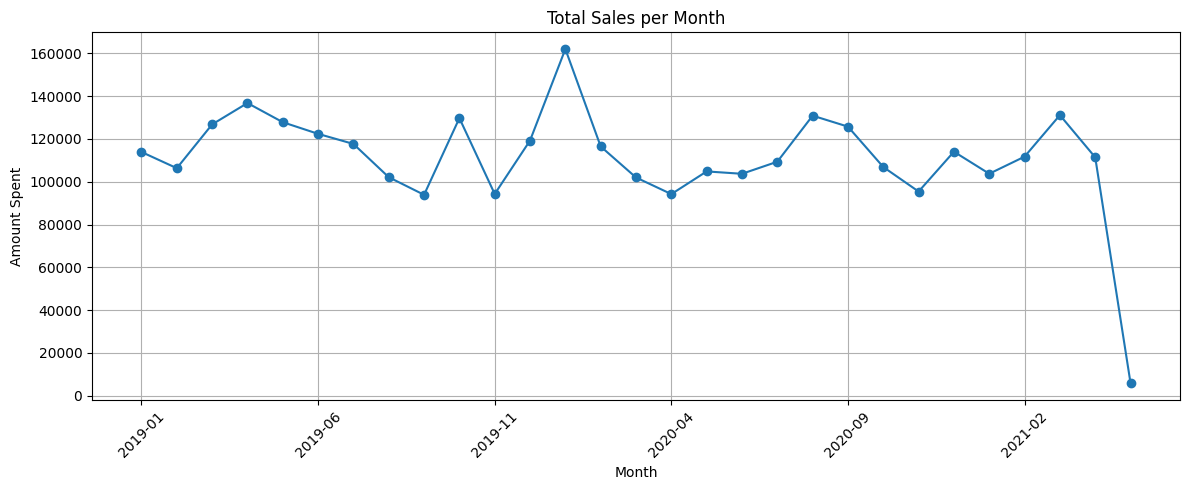

In [32]:
#Visualizacion de ventas por mes
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o')
plt.title("Total Sales per Month")
plt.ylabel("Amount Spent")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

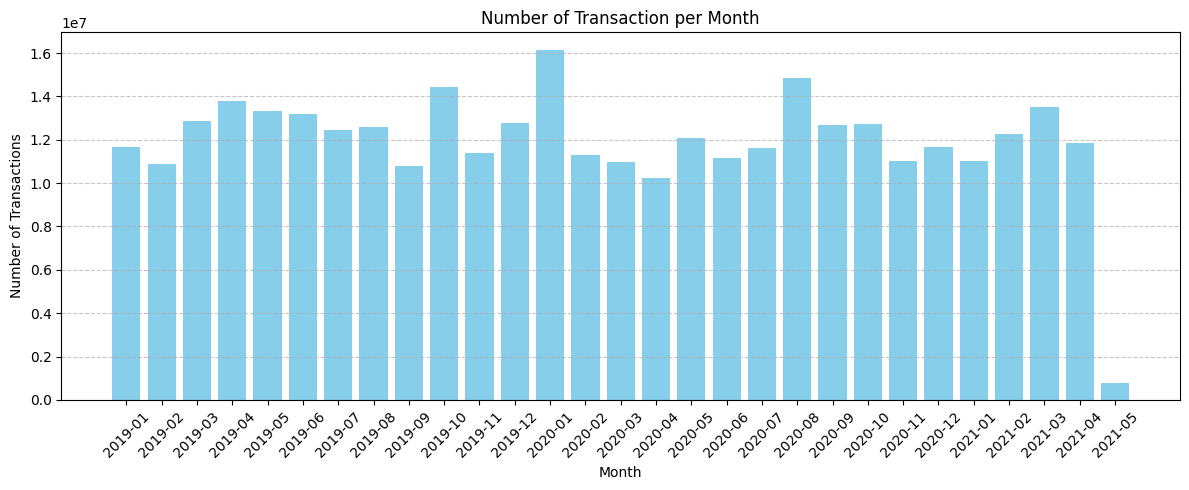

In [33]:
#Viusalizacion de transacciones por mes
plt.figure(figsize=(12,5))

#monthly_transaction.plot(marker='o')

plt.bar(monthly_transaction.index, monthly_transaction.values, color="skyblue")
plt.title("Number of Transaction per Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
#Que segmento de cliente gasta 
df.groupby("Segment")["Amount_spent"].mean().sort_values(ascending=True)

Segment
Gold        1389.527227
Basic       1411.730183
Silver      1411.875912
Missing     1427.676612
Platinum    1455.118731
Name: Amount_spent, dtype: float64

In [35]:
#Diferencia de gastos entre generos
df.groupby("Gender")["Amount_spent"].mean()

Gender
Female       1429.031627
Male         1407.716397
Undefined    1344.731538
Name: Amount_spent, dtype: float64

In [36]:
#Relacion de la edad con el gasto

#filtrar los datos validos
df_age_filtered = df[df["Age"] != -1]

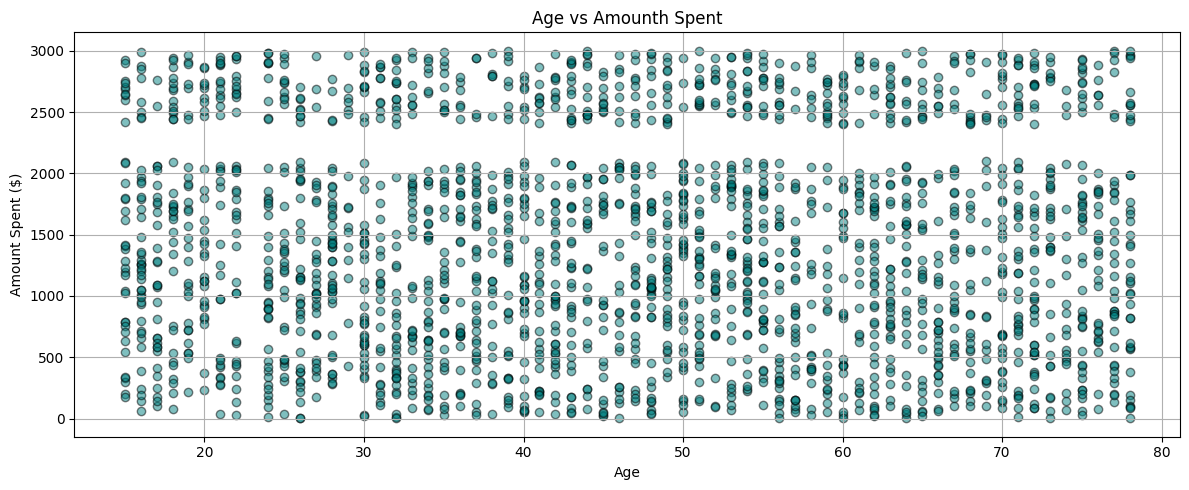

In [37]:
#grafico de gasto por edad
plt.figure(figsize=(12,5))
plt.scatter(df_age_filtered["Age"], df_age_filtered["Amount_spent"], alpha=0.5, color="teal", edgecolors="k")

plt.title("Age vs Amounth Spent")
plt.xlabel("Age")
plt.ylabel("Amount Spent ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
#exportar csv con los datos limpos
df.to_csv("online_store_customer_data_cleaned.csv", index=False)